Question 1: The binary categorical response variable to model for logistic regression that we have chosen is DEATH_EVENT.

Question 2: The variables we have chosen are age, high_blood_pressure, serum_creatinine, and ejection_fraction as DEATH_EVENT is very much infleunced by these variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/M148TeamProject/heart_failure_clinical_records_dataset.csv')
df.head()

Mounted at /content/drive


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
y = df['DEATH_EVENT']
x = df[['age', 'ejection_fraction', "serum_creatinine", 'high_blood_pressure']]

x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#we train the logistic model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)     # model fitted on standardized (x) data

y_pred_train = model.predict(x_train_scaled)

conf_matrix = confusion_matrix(y_train, y_pred_train)

#to calculate the confusion matrix, we calaculate the TN, FP, FN, and TP to get the specific elements
TN, FP, FN, TP = conf_matrix.ravel()

prediction_accuracy = accuracy_score(y_train, y_pred_train)
prediction_error = 1 - prediction_accuracy
true_positive_rate = TP / (TP + FN)
true_negative_rate = TN / (TN + FP)

print("\nConfusion Matrix (Training Data):")
print(conf_matrix)
print(f"\nPrediction Accuracy: {prediction_accuracy:.4f}")
print(f"Prediction Error: {prediction_error:.4f}")
print(f"True Positive Rate: {true_positive_rate:.4f}")
print(f"True Negative Rate: {true_negative_rate:.4f}")


Confusion Matrix (Training Data):
[[156  12]
 [ 35  36]]

Prediction Accuracy: 0.8033
Prediction Error: 0.1967
True Positive Rate: 0.5070
True Negative Rate: 0.9286


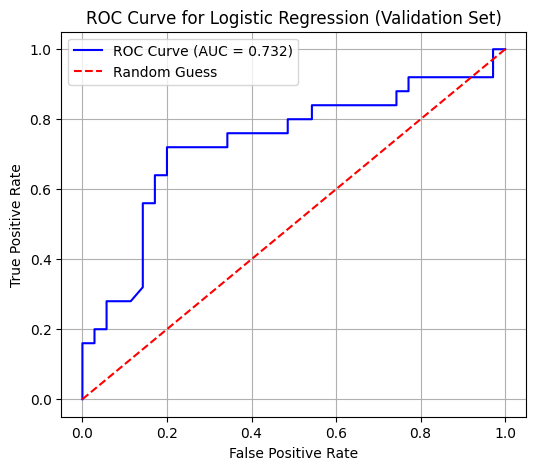

AUC on Validation Set: 0.7320

Mean Accuracy: 0.6667
Mean AUC: 0.7155

5-Fold Cross_Validation Results on Validation Set:
Fold 1: Accuracy = 0.5833, AUC = 0.6000
Fold 2: Accuracy = 0.6667, AUC = 0.8857
Fold 3: Accuracy = 0.7500, AUC = 0.8750
Fold 4: Accuracy = 0.7500, AUC = 0.6857
Fold 5: Accuracy = 0.5833, AUC = 0.5312


In [ ]:
#x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# we are trying to predict probabilities for the positive class, i.e. when the DEATH_EVENT = 1
y_val_prob = model.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_val_prob)
auc_score = roc_auc_score(y_test, y_val_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr,tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Logistic Regression (Validation Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC on Validation Set: {auc_score:.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores= cross_val_score(model,x_test_scaled, y_test, cv=kf, scoring='accuracy')

auc_scores = cross_val_score(model, x_test_scaled, y_test, cv=kf, scoring='roc_auc')

print(f"\nMean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean AUC: {np.mean(auc_scores):.4f}")

print("\n5-Fold Cross_Validation Results on Validation Set:")
for i in range(5):
  print(f"Fold {i+1}: Accuracy = {accuracy_scores[i]:.4f}, AUC = {auc_scores[i]:.4f}")



In [ ]:
# log-odds ratio
log_odds = model.coef_[0]          # log-odds coefficients - using standardized data, so coeffs are comparable
odds_ratios = np.exp(log_odds)

feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Log_Odds_Coefficient': log_odds,
    'Odds_Ratio': odds_ratios,
})

print(feature_importance)

               Feature  Log_Odds_Coefficient  Odds_Ratio
0                  age              0.709450    2.032872
1    ejection_fraction             -0.829669    0.436194
2     serum_creatinine              0.737347    2.090382
3  high_blood_pressure              0.210328    1.234082


Question 5: We chose a default threshold value of 0.5 for positive predictions. The reason we chose this defualt value is because this gives each possibility, living or dying an equal chance. Additionally, our DEATH_EVENT variable is not an imbalanced variable hence leaving 0.5 as an appropriate value.